## Capstone Two - Pre-processing and Training Data Development


### The Data Science Method

1. Problem Identification

2. Data Wrangling

3. Exploratory Data Analysis

4.   **Pre-processing and Training Data Development**
  * Creating dummy features or indicator features for categorical variables
  * Standardize the magnitude of numeric features using a scaler
  * Split into testing and training datasets

5.  Modeling

## Step 1
### Start by loading the necessary packages.

In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

# load cleaned dataset
df = pd.read_csv(r'C:\Users\yanks\Desktop\Springboard\Unit 27\cleaned_TelecomCxChurn.csv')

## Step 2
### Explore and Inspect the Data.

In [3]:
# Inspect the data
print(df.info())
print(df.describe())
print(df.columns)

# Check for missing values
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


### Step 2: Explore and Inspect the Data
- Use `.info()` to inspect data types and missing values.
- Use `.describe()` to check summary statistics for numeric columns.
- Use `.columns` to get an overview of column names.
- Use `.isnull().sum()` to identify any remaining missing values that need handling.

## Step 3
### Handle Missing Values.

In [10]:
from sklearn.impute import SimpleImputer

# Define numeric columns
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns

# Handle missing values for numeric columns
imputer = SimpleImputer(strategy='mean')
df[numeric_columns] = imputer.fit_transform(df[numeric_columns])

# Verify there are no missing values remaining
print(df[numeric_columns].isnull().sum())

SeniorCitizen     0
tenure            0
MonthlyCharges    0
TotalCharges      0
dtype: int64


### Step 3: Handle Missing Values
- Use `SimpleImputer` to handle missing values in numeric columns.
- Strategy: Replace missing values with the column mean.
- Verify no missing values remain after imputation.

## Step 4 
### Create Dummy Features.

In [5]:
# Identify categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns
print(categorical_cols)

# Convert categorical variables to dummy/indicator variables
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

Index(['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn'],
      dtype='object')


### Step 4: Create Dummy Features
- Use `pd.get_dummies()` to convert categorical columns into dummy variables.
- Set `drop_first=True` to avoid multicollinearity in the data.

## Step 5
### Standardize Numeric Features.

In [6]:
# Standardize numeric columns
scaler = StandardScaler()
df[numeric_columns] = scaler.fit_transform(df[numeric_columns])

### Step 5: Standardize Numeric Features
- Standardizing ensures numeric columns have a mean of 0 and a standard deviation of 1.
- This step is critical for algorithms sensitive to the scale of input features (e.g., Logistic Regression).

## Step 6
### Split Data into Training and Testing Sets.

In [7]:
# Define target (y) and features (X)
X = df.drop('Churn_Yes', axis=1)  # Replace 'Churn_Yes' with your target column name
y = df['Churn_Yes']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Step 6: Split Data into Training and Testing Sets
- Separate the target column (`Churn_Yes`) from the features.
- Use `train_test_split` to split the data into training (70%) and testing (30%) sets.
- Random seed ensures reproducibility.

## Step 7 
### Perform Exploratory Data Analysis (Optional but Recommended)

In [ ]:
# Visualize distributions of numeric columns
fig, ax = plt.subplots(len(numeric_columns), 2, figsize=(15, len(numeric_columns) * 5))
for i, col in enumerate(numeric_columns):
    sns.boxplot(data=df, x=col, ax=ax[i, 0])
    sns.histplot(data=df, x=col, kde=True, ax=ax[i, 1])
plt.tight_layout()

# Correlation heatmap
sns.heatmap(df.corr(), annot=False, cmap='coolwarm', fmt='.2f', square=True)
plt.show()

### Step 7: Perform Exploratory Data Analysis (Optional)
- Visualize distributions of numeric columns using boxplots and histograms.
- Generate a correlation heatmap to identify relationships between features and the target variable.

## Step 8
### Train Model (Example with Logistic Regression)

              precision    recall  f1-score   support

       False       0.85      0.90      0.87      1539
        True       0.68      0.57      0.62       574

    accuracy                           0.81      2113
   macro avg       0.77      0.74      0.75      2113
weighted avg       0.80      0.81      0.81      2113

ROC AUC Score: 0.8586518237780539


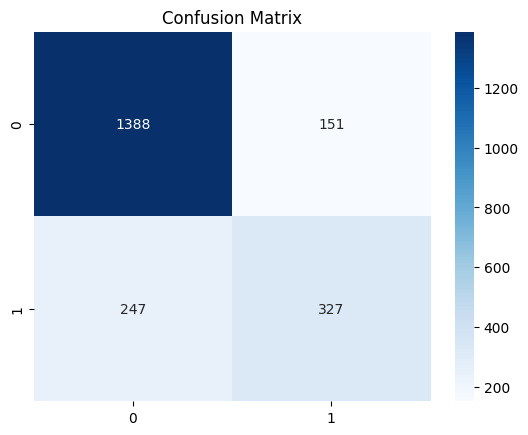

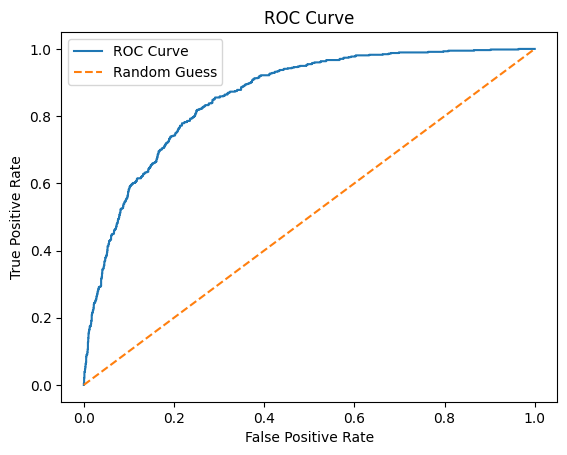

In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix, roc_curve, accuracy_score

# Train Logistic Regression
clf = LogisticRegression(random_state=42, max_iter=500)
clf.fit(X_train, y_train)

# Predictions
y_pred = clf.predict(X_test)
y_proba = clf.predict_proba(X_test)[:, 1]

# Evaluate the Model
print(classification_report(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_proba))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.plot(fpr, tpr, label="ROC Curve")
plt.plot([0, 1], [0, 1], linestyle="--", label="Random Guess")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()


### Step 8: Train Model (Example with Logistic Regression)
- Train a Logistic Regression model using the training set.
- Evaluate the model with a classification report and ROC AUC score.
- Visualize performance with a confusion matrix and ROC curve.


## Step 9
### Save Preprocessed Data (Optional)

In [9]:
# Save the processed dataset for future use
df.to_csv("preprocessed_TelecomCxChurn.csv", index=False)